In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


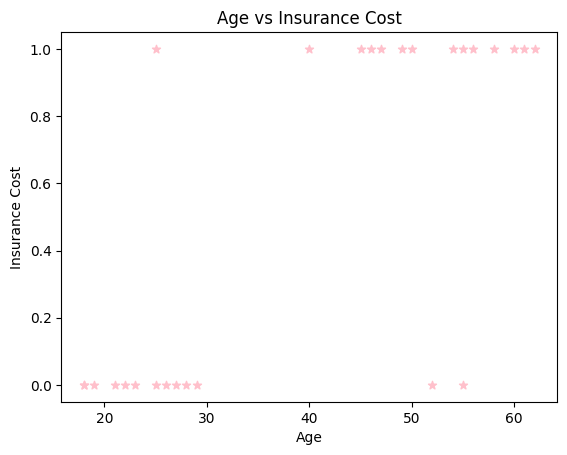

In [4]:
plt.scatter(df.age, df.bought_insurance, color='pink', marker='*')
plt.title("Age vs Insurance Cost")
plt.xlabel("Age")
plt.ylabel("Insurance Cost")
plt.show()



In [5]:
from sklearn.model_selection import train_test_split


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df[['bought_insurance']], test_size=0.8, random_state=9)

In [7]:
x_train

,age
1,25
25,54
24,50
22,40
21,26


In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\komal\OneDrive\Desktop\rohan hw\myenv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
x_test

,age
5,56
9,61
15,55
4,46
3,52
7,60
18,19
19,18
6,55
2,47


In [10]:
y_predicted = model.predict(x_test)

In [11]:
model.predict_proba(x_test)

array([[1.06053460e-05, 9.99989395e-01],
       [8.34543923e-07, 9.99999165e-01],
       [1.76334694e-05, 9.99982367e-01],
       [1.70980283e-03, 9.98290197e-01],
       [8.10509591e-05, 9.99918949e-01],
       [1.38760206e-06, 9.99998612e-01],
       [9.99363200e-01, 6.36799526e-04],
       [9.99616913e-01, 3.83086631e-04],
       [1.76334694e-05, 9.99982367e-01],
       [1.02902545e-03, 9.98970975e-01],
       [9.64113161e-01, 3.58868393e-02],
       [9.06695885e-01, 9.33041152e-02],
       [9.86714837e-01, 1.32851635e-02],
       [9.99616913e-01, 3.83086631e-04],
       [9.95153443e-01, 4.84655715e-03],
       [9.41716787e-01, 5.82832135e-02],
       [3.72459886e-04, 9.99627540e-01],
       [9.97079501e-01, 2.92049925e-03],
       [2.83968514e-03, 9.97160315e-01],
       [3.83615219e-06, 9.99996164e-01],
       [5.01918687e-07, 9.99999498e-01],
       [9.98241481e-01, 1.75851852e-03]])

In [12]:
model.score(x_test, y_test)         

0.8636363636363636

In [13]:
y_predicted

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [14]:
x_test

,age
5,56
9,61
15,55
4,46
3,52
7,60
18,19
19,18
6,55
2,47


In [15]:
model.coef_

array([[0.50844758]])

In [16]:
model.intercept_

array([-17.01892266])

In [17]:
model.predict(x_test)


array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [18]:
print(model.predict([[30]]))
print(model.predict([[60]]))

[0]
[1]


c:\Users\komal\OneDrive\Desktop\rohan hw\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\komal\OneDrive\Desktop\rohan hw\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


lets define a sigmoid function now and do math


In [19]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [20]:
def prediction_function(age):
    z = model.coef_[0][0] * age + model.intercept_[0]
    return sigmoid(z)
print(prediction_function(30))
print(prediction_function(60))

0.14610342689442404
0.9999986123979391


    hehehheheheehe

In [21]:
# lets make a logistic regression model using sklearn's LogisticRegressionz of logistic model/avocado_ripeness_dataset.csv
df = pd.read_csv("avocado_ripeness_dataset.csv")
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


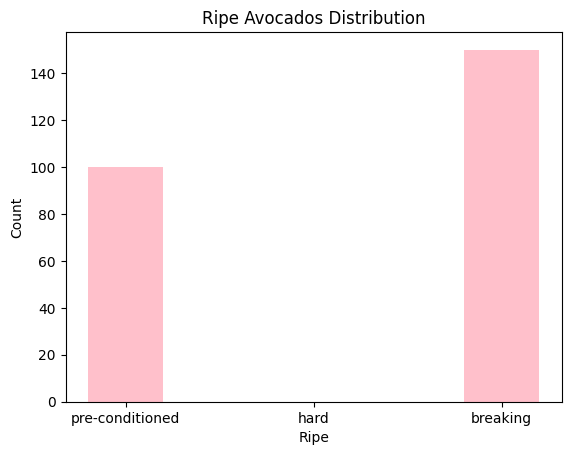

In [24]:
plt.hist(df['ripeness'], bins=2, color='pink', rwidth=0.2)
plt.title("Ripe Avocados Distribution") 
plt.xlabel("Ripe")
plt.ylabel("Count")
plt.show()

In [28]:
#lets predict the ripeness of avocados using logistic regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['weight_g', 'size_cm3']], df[['ripeness']], test_size=0.2, random_state=9)
x_train

,weight_g,size_cm3
77,167,296
105,193,236
15,289,131
222,152,265
247,188,274
...,...,...
182,221,201
245,254,134
249,190,272
92,215,192


In [32]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)

c:\Users\komal\OneDrive\Desktop\rohan hw\myenv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\komal\OneDrive\Desktop\rohan hw\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
x_test

,weight_g,size_cm3
93,299,128
78,168,275
243,224,223
154,217,239
201,181,279
135,223,204
17,169,224
170,260,127
181,291,120
176,210,258


In [33]:
model1.coef_

array([[ 0.00841541,  0.02638997],
       [-0.07588721,  0.06056561],
       [ 0.11048772, -0.18719002],
       [ 0.06346746, -0.07971421],
       [-0.10648338,  0.17994865]])

In [34]:
model1.intercept_

array([ -2.51771904,   7.01814835,   9.00973045,   4.85749539,
       -18.36765516])

In [35]:
model.predict(x_test)

array(['hard', 'ripe', 'breaking', 'breaking', 'ripe', 'breaking',
       'firm-ripe', 'hard', 'hard', 'firm-ripe', 'breaking', 'ripe',
       'firm-ripe', 'pre-conditioned', 'breaking', 'firm-ripe', 'ripe',
       'breaking', 'breaking', 'pre-conditioned', 'pre-conditioned',
       'ripe', 'pre-conditioned', 'hard', 'ripe', 'pre-conditioned',
       'pre-conditioned', 'pre-conditioned', 'ripe', 'pre-conditioned',
       'hard', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'breaking',
       'breaking', 'firm-ripe', 'firm-ripe', 'firm-ripe', 'firm-ripe',
       'ripe', 'firm-ripe', 'hard', 'ripe', 'pre-conditioned', 'hard',
       'pre-conditioned', 'hard'], dtype=object)

In [36]:
model1.predict([[100, 200], [150, 300], [200, 400]])

c:\Users\komal\OneDrive\Desktop\rohan hw\myenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['firm-ripe', 'ripe', 'ripe'], dtype=object)